In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
import seaborn as sns

In [330]:
p_data = pd.read_csv('~/Documents/GitHub/dsc160-code/dsc160-midterm-404-not-found/data/picasso_women.csv')
m_data = pd.read_csv('~/Documents/GitHub/dsc160-code/dsc160-midterm-404-not-found/data/matisse_women.csv')

In [331]:
p_data = p_data.drop(['Unnamed: 0'],axis = 1)
m_data = m_data.drop(['Unnamed: 0'],axis = 1)

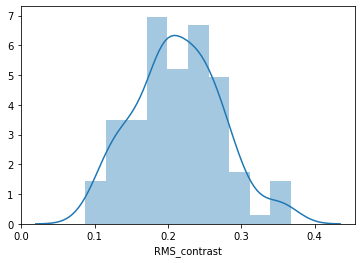

In [332]:
p_data.RMS_contrast.mean()
sns.distplot(p_data.RMS_contrast);

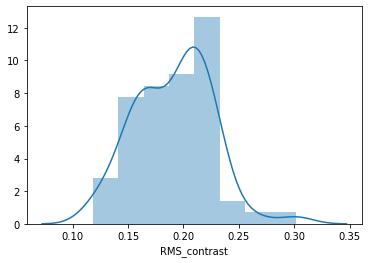

In [333]:
sns.distplot(m_data.RMS_contrast);

**Analysis of Pablo Picasso' Portraits**

In [334]:
# p_data = p_data.drop(['Unnamed: 0'],axis = 1)

In [335]:
p_data = p_data.assign(RMS_contrast_log = np.log2(p_data.RMS_contrast)).assign(AVG_entropy_log = np.log2(p_data.AVG_entropy))
p_data

,Picturesource,Painting,Year,Portrait,RMS_contrast,AVG_entropy,RMS_contrast_log,AVG_entropy_log
0,images-works-3437_s.jpg,"('maternity', 1905)",1905,0.0,0.271341,3.756512,-1.881822,1.909394
1,images-works-56_s.jpg,"(""les demoiselles d'avignon (the young ladies ...",1907,1.0,0.197231,5.041706,-2.342045,2.333912
2,images-works-1513_s.jpg,"('portrait of woman', 1938)",1938,1.0,0.191595,5.023209,-2.383869,2.328609
3,images-works-3570_s.jpg,"('naked woman', 1902)",1902,1.0,0.145416,5.223912,-2.781742,2.385131
4,images-works-1459_s.jpg,"('woman with a blue hat', 1939)",1939,1.0,0.262751,5.015289,-1.928229,2.326333
...,...,...,...,...,...,...,...,...
118,images-works-4053_s.jpg,"('seated woman in blue dress', 1939)",1939,1.0,0.146214,4.933578,-2.773851,2.302634
119,images-works-2244_s.jpg,"('profile female bust', 1932)",1932,1.0,0.261993,4.519896,-1.932402,2.176290
120,images-works-1760_s.jpg,"('woman sitting in an armchair', 1941)",1941,1.0,0.142179,4.642326,-2.814218,2.214848
121,images-works-2693_s.jpg,"(""head and woman's hand"", 1921)",1921,1.0,0.202769,4.721895,-2.302092,2.239366


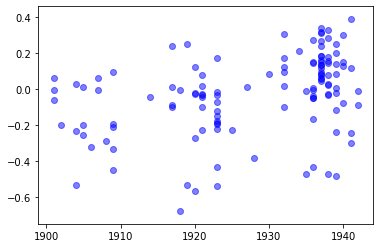

In [353]:
plt.scatter(p_data.Year, p_data.erotic_charge, c='blue', alpha=0.5)

In [336]:
p_data.groupby(['Portrait']).RMS_contrast.describe()

,count,mean,std,min,25%,50%,75%,max
Portrait,,,,,,,,
0.0,35.0,0.194652,0.061200,0.087192,0.162878,0.189273,0.224963,0.360254
1.0,88.0,0.221022,0.056623,0.112868,0.187488,0.229779,0.258422,0.367527


In [337]:
p_data.groupby(['Portrait']).RMS_contrast_log.describe()

,count,mean,std,min,25%,50%,75%,max
Portrait,,,,,,,,
0.0,35.0,-2.432895,0.471412,-3.519657,-2.618555,-2.401462,-2.152239,-1.472915
1.0,88.0,-2.227610,0.389999,-3.147291,-2.415128,-2.121683,-1.952243,-1.444076


In [338]:
p_data.groupby(['Portrait']).AVG_entropy.describe()

,count,mean,std,min,25%,50%,75%,max
Portrait,,,,,,,,
0.0,35.0,4.635955,0.387964,3.756512,4.425247,4.620800,4.992641,5.248086
1.0,88.0,4.743388,0.438597,2.733015,4.492905,4.810093,5.025614,5.480808


In [339]:
p_data.groupby(['Portrait']).AVG_entropy_log.describe()

,count,mean,std,min,25%,50%,75%,max
Portrait,,,,,,,,
0.0,35.0,2.207787,0.123957,1.909394,2.145757,2.208143,2.319756,2.391791
1.0,88.0,2.239141,0.145022,1.450493,2.167648,2.266059,2.329299,2.454388


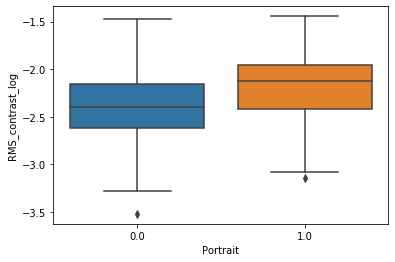

In [340]:
box_1 = sns.boxplot(x="Portrait", y="RMS_contrast_log", data=p_data)

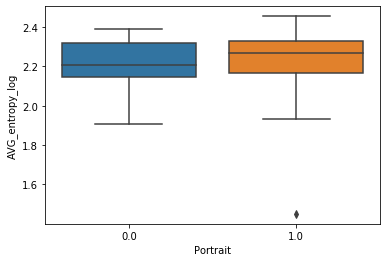

In [341]:
box_2 = sns.boxplot(x="Portrait", y="AVG_entropy_log", data=p_data)

In [342]:
p_data = p_data.assign(erotic_charge = 0.5 * p_data.RMS_contrast_log + 0.5*p_data.AVG_entropy_log)

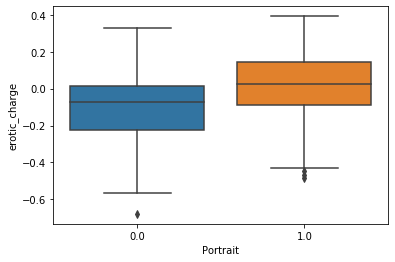

In [343]:
box_3 = sns.boxplot(x="Portrait", y="erotic_charge", data=p_data)

**Analysis of Henri Matisse' Portraits**

In [344]:
# m_data = m_data.drop(['Unnamed: 0'],axis = 1)

In [345]:
m_data = m_data.drop([1,8,10,11,13,14,17]).reset_index(drop = True)

In [346]:
m_data = m_data.assign(RMS_contrast_log = np.log2(m_data.RMS_contrast)).assign(AVG_entropy_log = np.log2(m_data.AVG_entropy))
m_data = m_data.assign(erotic_charge = 0.5 * m_data.RMS_contrast_log + 0.5*m_data.AVG_entropy_log)

In [347]:
m_data.RMS_contrast.mean(),p_data.RMS_contrast.mean()

(0.18838706126513782, 0.21351799959875836)

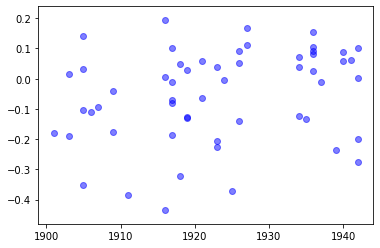

In [352]:
plt.scatter(m_data.Year, m_data.erotic_charge, c='blue', alpha=0.5)

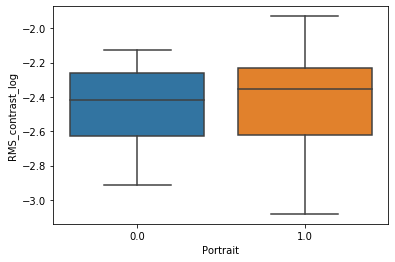

In [350]:
box_4 = sns.boxplot(x ="Portrait" ,y="RMS_contrast_log",data=m_data)

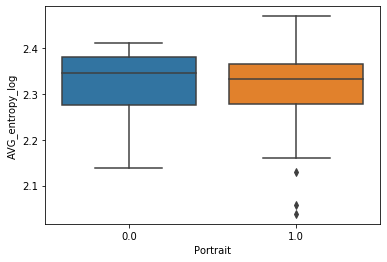

In [351]:
box_5 = sns.boxplot(x ="Portrait" ,y="AVG_entropy_log",data=m_data)

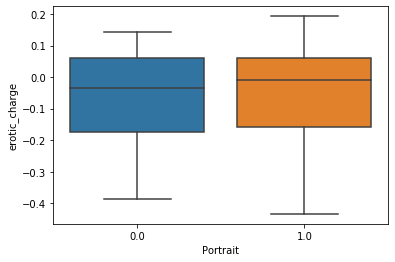

In [259]:
box_6 = sns.boxplot(x = "Portrait", y = "erotic_charge", data=m_data)

In [172]:
m_data.groupby(['Portrait']).RMS_contrast.mean()

Portrait
0.0    0.204031
1.0    0.189835
Name: RMS_contrast, dtype: float64

In [173]:
m_data.groupby(['Portrait']).AVG_entropy.describe()

,count,mean,std,min,25%,50%,75%,max
Portrait,,,,,,,,
0.0,9.0,4.964271,0.325009,4.405845,4.706921,5.063866,5.171739,5.315706
1.0,49.0,5.018514,0.310499,4.107550,4.882069,5.059293,5.151394,5.538950


In [355]:
p_data.to_csv (r'../data/picasso_data.csv', index = False, header=True)

In [356]:
m_data.to_csv (r'../data/matisse_data.csv', index = False, header=True)